In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df= pd.read_excel('Data_train.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
test_df= pd.read_excel('Test_set.xlsx')
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
final_df = train_df.append(test_df)
final_df.head()

C:\Users\kaif\AppData\Local\Temp\ipykernel_1856\2290748709.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = train_df.append(test_df)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [5]:
final_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [6]:
final_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [7]:
final_df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [8]:
##feature engineering
final_df['Date'] = final_df['Date_of_Journey'].str.split('/').str[0]
final_df['Month'] = final_df['Date_of_Journey'].str.split('/').str[1]
final_df['Year'] = final_df['Date_of_Journey'].str.split('/').str[2]

In [9]:
final_df['Date'] = final_df['Date'].astype(int)
final_df['Month'] = final_df['Month'].astype(int)
final_df['Year'] = final_df['Year'].astype(int)


In [10]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int32  
 12  Month            13354 non-null  int32  
 13  Year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.4+ MB


In [11]:
final_df.drop('Date_of_Journey',axis=1,inplace=True)

In [12]:
final_df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Date', 'Month',
       'Year'],
      dtype='object')

In [13]:
final_df['Arrival_Time']

0       01:10 22 Mar
1              13:15
2       04:25 10 Jun
3              23:30
4              21:35
            ...     
2666    20:25 07 Jun
2667           16:55
2668    04:25 07 Mar
2669           19:15
2670           19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [14]:
final_df['Arrival_Time'] = final_df['Arrival_Time'].str.split(' ').str[0]

In [15]:
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019


In [16]:
final_df['Arrival_hour'] = final_df['Arrival_Time'].str.split(':').str[0]
final_df['Arrival_min'] = final_df['Arrival_Time'].str.split(':').str[1] 
final_df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15


In [17]:
final_df['Arrival_hour'] = final_df['Arrival_hour'].astype(int)
final_df['Arrival_min'] = final_df['Arrival_min'].astype(int)

In [18]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int32  
 11  Month            13354 non-null  int32  
 12  Year             13354 non-null  int32  
 13  Arrival_hour     13354 non-null  int32  
 14  Arrival_min      13354 non-null  int32  
dtypes: float64(1), int32(5), object(9)
memory usage: 1.4+ MB


In [19]:
final_df.drop('Arrival_Time',axis=1,inplace= True)

In [20]:
final_df['Dep_hour'] = final_df['Dep_Time'].str.split(':').str[0]
final_df['Dep_min'] = final_df['Dep_Time'].str.split(':').str[1] 
final_df['Dep_hour'] = final_df['Dep_hour'].astype(int)
final_df['Dep_min'] = final_df['Dep_min'].astype(int)
final_df.drop('Dep_Time',axis=1,inplace= True)

In [21]:
final_df.info()
final_df.head(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int32  
 9   Month            13354 non-null  int32  
 10  Year             13354 non-null  int32  
 11  Arrival_hour     13354 non-null  int32  
 12  Arrival_min      13354 non-null  int32  
 13  Dep_hour         13354 non-null  int32  
 14  Dep_min          13354 non-null  int32  
dtypes: float64(1), int32(7), object(7)
memory usage: 1.3+ MB


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20


arr = list(final_df['Duration'])
Duration_hrs = []
Duration_mins = []
for x in arr:
    time = x.split(" ")
    if len(time) > 1:
        hrs = time[0].split("h")[0]
        minutes = time[1].split("m")[0]
        Duration_hrs.append(hrs)
        Duration_mins.append(minutes)
    else:
        if time[0].find("h") != -1:
            hrs = time[0].split("h")[0]
            Duration_hrs.append(hrs)
            Duration_mins.append('0')
        elif time[0].find("m") != -1:
            minutes = time[0].split("m")[0]
            Duration_hrs.append('0')
            Duration_mins.append(minutes)

final_df["Duration_hrs"] = Duration_hrs
final_df["Duration_mins"] = Duration_mins
final_df.drop(['Duration'],axis=1,inplace=True)

In [22]:
# other way for converting the the furation into minutes
final_df['Duration'] = final_df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)


In [23]:
final_df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662.0,1,5,2019,13,15,5,50


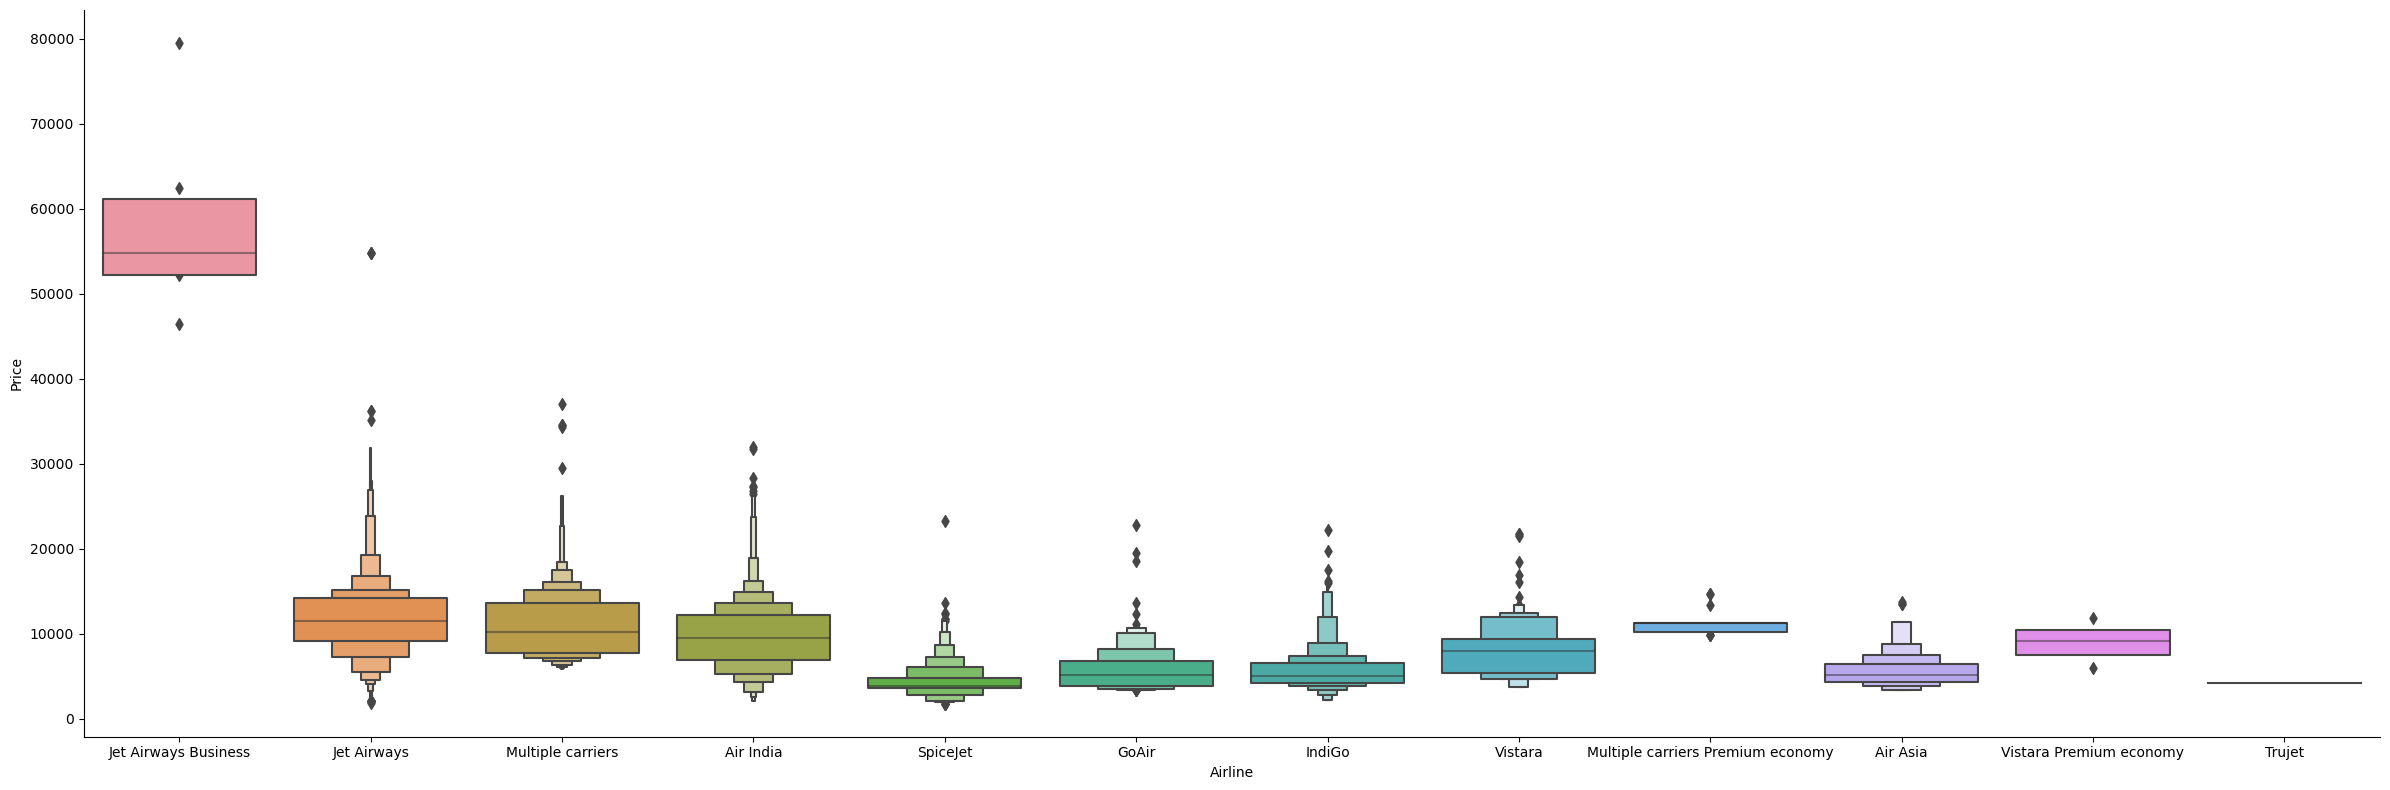

In [43]:
import seaborn as sns
sns.catplot( y = "Price", x = "Airline", data = final_df.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)



# conclusion :
Here with the help of the cat plot we are trying to plot the boxplot between the price of the flight and airline and we can conclude that Jet Airways has the most outliers in terms of price or we can say that the most expensive option is 'jet airways buisiness'.

# Plotting Bar chart between Months  vs Number of Flights :

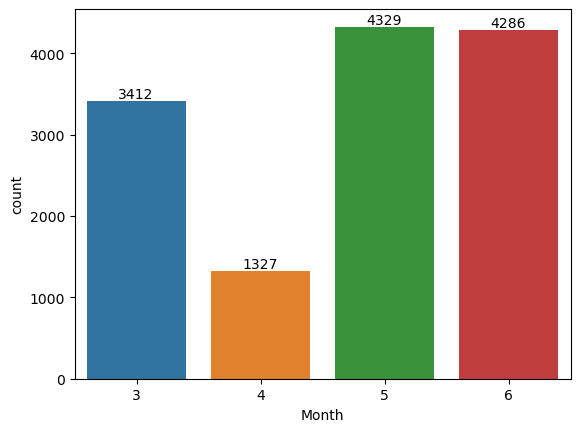

In [25]:
ax = sns.countplot(x = 'Month', data = final_df)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

## conclusion
Here in the above graph we have plotted the count plot for journey in a month vs several flights and got to see that May has the most number of flights.

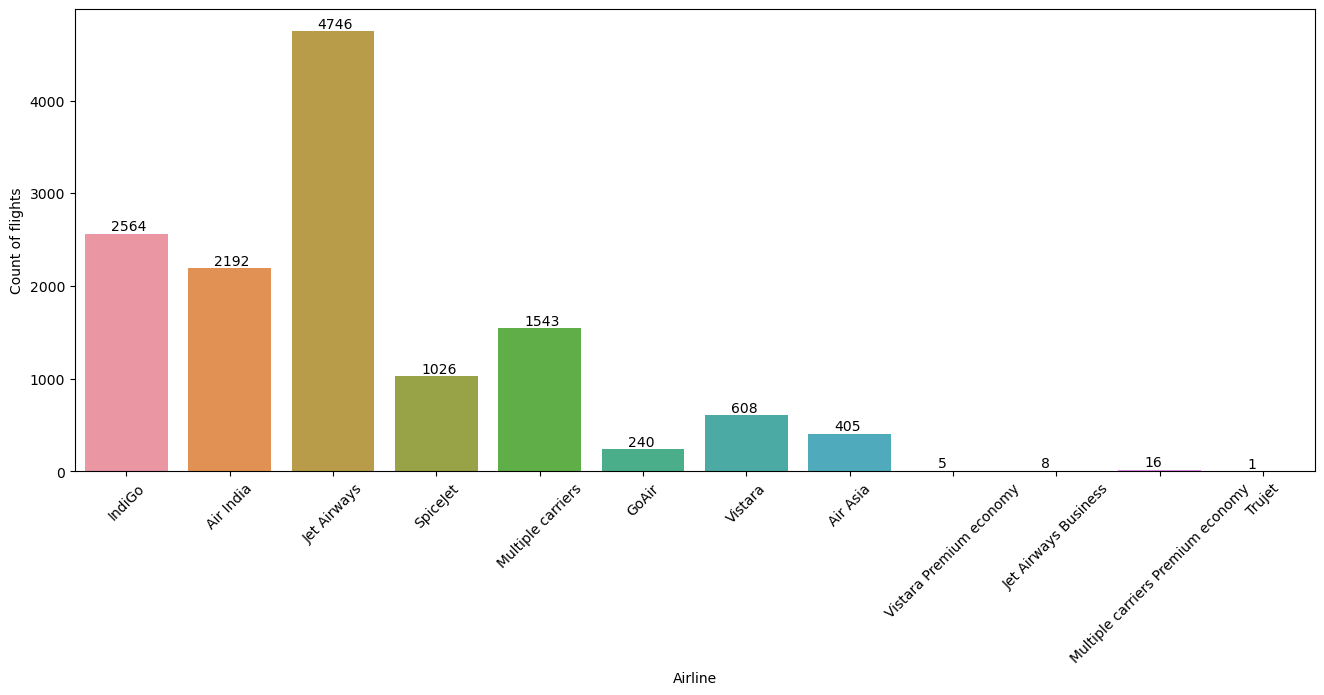

In [44]:
ax = sns.countplot(x = 'Airline', data =final_df)
plt.ylabel('Count of flights')
plt.xticks(rotation = 45)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

## conclusion :
#### Jet Airways has the most flight boarded.

In [45]:
# dealing with categorical features
final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [46]:
# applying transfrom  technique on categorical features
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder ()

final_df['Airline'] = labelencoder.fit_transform(final_df['Airline'])
final_df['Source'] = labelencoder.fit_transform(final_df['Source'])
final_df['Destination'] = labelencoder.fit_transform(final_df['Destination'])
final_df['Additional_Info'] = labelencoder.fit_transform(final_df['Additional_Info'])


In [47]:
final_df.shape

(13354, 15)

In [50]:
final_df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,3,0,5,BLR → DEL,170,non-stop,8,3897.0,24,3,2019,1,10,22,20
1,1,3,0,CCU → IXR → BBI → BLR,445,2 stops,8,7662.0,1,5,2019,13,15,5,50


In [51]:
final_df.tail()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
2666,1,3,0,CCU → DEL → BLR,1435,1 stop,8,NaN,6,6,2019,20,25,20,30
2667,3,3,0,CCU → BLR,155,non-stop,8,NaN,27,3,2019,16,55,14,20
2668,4,2,1,DEL → BOM → COK,395,1 stop,8,NaN,6,3,2019,4,25,21,50
2669,1,2,1,DEL → BOM → COK,915,1 stop,8,NaN,6,3,2019,19,15,4,0
2670,6,2,1,DEL → BOM → COK,860,1 stop,8,NaN,15,6,2019,19,15,4,55


## further for pediction 